# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Welcome In my Notebook</p>

 <p style="background-color:Tomato;font-family:newtimeroman;color:black;font-size:150%;text-align:center;border-radius:20px 60px;">I hope you Like it. and Don't forget to apvote.</p>

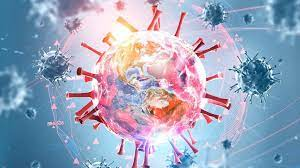

   ## Here we have a problem statment.
     * predict the total number of cinfirmed cases

 <a id="1"></a>
<p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from fbprophet import Prophet
import plotly.express as px
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

<a id="2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Data</p>

In [ ]:
#Loading Data
df=pd.read_csv('../input/covid-19-clean-complete/covid_19_clean_complete.csv')
df.head()

In [ ]:
#print the some of the information about data
print("The shape of data",df.shape)
print("-------------------------------")
print("The information for data",df.info())


In [ ]:
df.dtypes

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

### Cheack NAN value

In [ ]:
df.isnull().sum()

In [ ]:
df['Date'].nunique()

### Here we can make agroupby (Date)

In [ ]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
total

In [ ]:
#we can rename the columns of data(total)
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet.head()

In [ ]:
#cheack if has null values
df_prophet.isna().sum()

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Ploting Data</p>

In [ ]:
sns.scatterplot(df_prophet['Deaths'], df_prophet['Recovered'], hue = df_prophet['Active'])

In [ ]:
px.scatter(df_prophet, x="Deaths", y="Recovered", color="Active")

#### We also see that the cases of death have begun to decrease sharply and the number of hospitalizations has increased, and this is a good thing for all.

In [ ]:
px.parallel_coordinates(df_prophet, color="Active",) 

In [ ]:
px.histogram(df_prophet, x="Deaths", y="Recovered", color="Active")

In [ ]:
px.scatter_polar(df_prophet, r="Deaths", theta="Recovered")

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Creat Model by using Prophet </p>


In [ ]:
m=Prophet()

In [ ]:
model=m.fit(df_prophet)

In [ ]:
model.seasonalities

### Make a prediction
    for Now going to do forecasting so to do forecasting I need some Future Days

In [ ]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')
future_global

In [ ]:
df_prophet.shape

In [ ]:
future_global.shape

##### we see the different in the shape for future_global and df_prophet 

In [ ]:
df_prophet['ds'].tail()

In [ ]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

### Now we make a prediction for date on feture_global

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Plorting The prediction</p>

In [ ]:
#plot the  prediction 
model.plot(prediction)

### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

In [ ]:
model.plot_components(prediction)

In [ ]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)
a

In [ ]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
df_cv
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

In [ ]:
#plot the df_cv('rmse')
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

In [ ]:
#plot the df_cv('mse')
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

In [ ]:
#plot by using ('mape')
df_performance=plot_cross_validation_metric(df_cv,metric='mape')

<a id="3.2"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">This is the End for this project Thank you for every thing see you in next work. </p>